In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [37]:
twitter_user = pd.read_csv('./datasets/users.csv')
tweets = pd.read_csv('./datasets/tweets.csv')
twitter_user.head()

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


In [63]:
tweets.fillna(0, inplace = True)
tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,0.0,0,0.0,#IslamKills Are you trying to say that there w...,7.123460e+17,0,"[""IslamKills""]",[],POSTED,[],0.000000e+00,0.0
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],0.000000e+00,0.0
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,0.0,0,0.0,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,0,[],[],POSTED,[],0.000000e+00,0.0
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,0.0,0,0.0,RT @jww372: I don't have to guess your religio...,8.134006e+17,0,"[""ChristmasAftermath""]",[],POSTED,[],0.000000e+00,0.0
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,0.0,0,0.0,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,0,[],[],POSTED,[],0.000000e+00,0.0
5,2.882014e+09,giselleevns,1.477496e+12,2016-10-26 15:33:58,0.0,0,0.0,"@ModicaGiunta me, too!",7.913019e+17,0,[],[],POSTED,[],0.000000e+00,0.0
6,1.658421e+09,baobaeham,1.488910e+12,2017-03-07 18:11:44,0.0,0,0.0,RT @MDBlanchfield: You’ll never guess who twee...,8.391768e+17,0,[],[],POSTED,[],0.000000e+00,0.0
7,2.587101e+09,judelambertusa,1.483102e+12,2016-12-30 12:49:30,0.0,0,0.0,RT @100PercFEDUP: New post: WATCH: DIAMOND AND...,8.148157e+17,0,[],[],POSTED,[],0.000000e+00,0.0
8,1.679279e+09,ameliebaldwin,1.477792e+12,2016-10-30 01:48:19,0.0,False,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After ...,7.925436e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""http://www.Feed24hNews.com/4MzaL""]",POSTED,"[""ariawilsongop""]",7.925391e+17,0.0
9,1.649488e+09,hiimkhloe,1.458155e+12,2016-03-16 19:07:39,0.0,0,0.0,One of the ways to remind that #BlackLivesMatt...,7.101807e+17,0,"[""Blacklivesmatter""]",[],POSTED,[],0.000000e+00,0.0


(-0.5, 399.5, 199.5, -0.5)

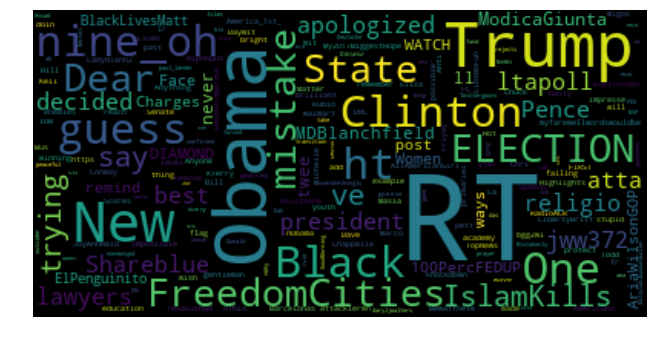

In [71]:
tweet_text = WordCloud().generate(str(tweets['text']))
# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(11,10))
axis1 = fig.add_subplot(111)
axis1.imshow(tweet_text, interpolation='bilinear')
axis1.axis("off")

(-0.5, 399.5, 199.5, -0.5)

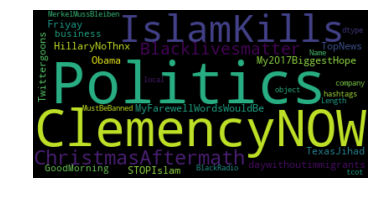

In [69]:
hashtags = WordCloud().generate(str(tweets['hashtags']))
# Display the generated image:
# the matplotlib way:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(hashtags, interpolation='bilinear')
plt.axis("off")